# after data engeenering

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

## Load data & setting

In [31]:
dataset = pd.read_csv("./new_titanic_mid_output/new_titanic_mid.csv")
train = pd.read_csv("dataset/train.csv")
# train_len = len(train)
# => 이전에 drop시킨 값들 이상치들 때문에 len이 안맞음
train_len = 881

test = pd.read_csv("dataset/test.csv")
IDtest = test["PassengerId"]

In [32]:
# 저장할 때 index=False해주어야 한다.
dataset.head()

,Age,Fare,Parch,Sex,SibSp,Survived,Fsize,Single,SmallF,MedF,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,22.0,1.981001,0,0,1,0.0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,4.266662,0,1,1,1.0,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,26.0,2.070022,0,1,0,1.0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,35.0,3.972177,0,1,1,1.0,2,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,35.0,2.085672,0,0,0,0.0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


## 6. MODELING

In [33]:
train = dataset[:train_len]
test = dataset[train_len:]
test.drop(labels=["Survived"],axis = 1,inplace=True)

/Users/kimyihwan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
## Separate train features and label 
# train set을 target feature과 label feature로 구분

train["Survived"] = train["Survived"].astype(int)

Y_train = train["Survived"]

X_train = train.drop(labels = ["Survived"],axis = 1)

/Users/kimyihwan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### 6.1 Simple modeling

#### 6.1.1 Cross validate models

I compared 10 popular classifiers and evaluate the mean accuracy of each of them by a stratified(계층의) kfold cross validation procedure.  

- SVC
- Decision Tree
- AdaBoost
- Random Forest
- Extra Trees
- Gradient Boosting
- Multiple layer perceptron ( neural network )
- KNN
- Logistic regression
- Linear Discriminant Analysis

In [35]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

0
[0.80898876 0.85227273 0.73863636 0.90909091 0.84090909 0.77272727
 0.81818182 0.79545455 0.85227273 0.84090909]
1
[0.71910112 0.79545455 0.73863636 0.80681818 0.84090909 0.82954545
 0.81818182 0.76136364 0.81818182 0.82954545]
2
[0.71910112 0.78409091 0.73863636 0.84090909 0.80681818 0.85227273
 0.84090909 0.73863636 0.86363636 0.86363636]
3
[0.82022472 0.78409091 0.77272727 0.82954545 0.79545455 0.875
 0.81818182 0.76136364 0.86363636 0.82954545]
4
[0.80898876 0.84090909 0.75       0.81818182 0.80681818 0.84090909
 0.82954545 0.73863636 0.78409091 0.85227273]
5
[0.84269663 0.79545455 0.75       0.875      0.875      0.81818182
 0.86363636 0.77272727 0.86363636 0.84090909]
6
[0.80898876 0.82954545 0.73863636 0.85227273 0.79545455 0.75
 0.84090909 0.78409091 0.82954545 0.85227273]
7
[0.7752809  0.77272727 0.73863636 0.80681818 0.84090909 0.73863636
 0.85227273 0.77272727 0.85227273 0.80681818]
8
[0.82022472 0.84090909 0.77272727 0.875      0.81818182 0.77272727
 0.81818182 0.79545455

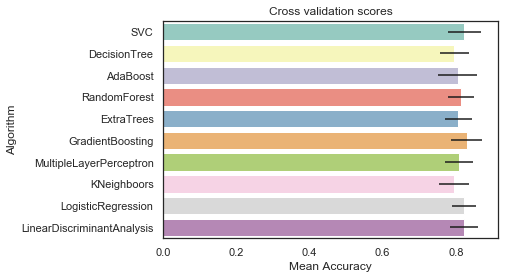

In [36]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
cnt = 0
for classifier in classifiers :
    print(cnt)
    cnt += 1
    score_list = cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4)
    cv_results.append(score_list)
    print(score_list)

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

I decided to choose the SVC, AdaBoost, RandomForest , ExtraTrees and the GradientBoosting classifiers for the ensemble modeling.
- SVC
- AdaBoost
- RandomForest
- ExtraTrees
- GradientBoosting  
  => 고르는 것은 저자가 알아서 정함..  
  => 차이점은 따로 공부해야지 


#### 6.1.2 Hyperparameter tunning for best models

I performed a **grid search optimization** for AdaBoost, ExtraTrees , RandomForest, GradientBoosting and SVC classifiers.  

I set the **"n_jobs" parameter to 4** since i have 4 cpu . The computation time is clearly reduced.  

But be carefull, this step can take a long time, i took me 15 min in total on 4 cpu.

-  META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING


In [37]:

# Adaboost

DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

# GridSearchCV in Adaboost
gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 824 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    3.3s finished


In [38]:
gsadaDTC.best_score_

0.8240635641316686

In [13]:
#ExtraTrees

ExtC = ExtraTreesClassifier()

## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

# GridSearchCV in ExtraTrees
gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   26.3s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   39.2s finished


0.8297389330306469

In [14]:
# RFC Parameters tunning 

RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

# GridSearchCV in RandomForest
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   27.8s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   43.5s finished


0.8331441543700341

In [15]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    5.7s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   27.5s finished


0.8297389330306469

In [16]:
### SVC classifier

SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   13.1s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   23.4s finished


0.8331441543700341

#### 6.1.3 Plot learning curves

Learning curves are a good way to see the overfitting effect on the training set and the effect of the training size on the accuracy.

- overfitting 확인 및 training size의 영향 확인

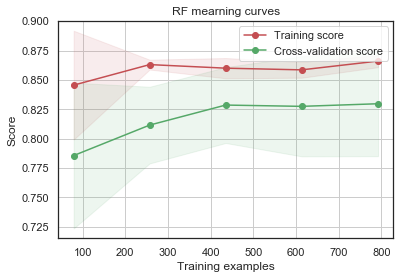

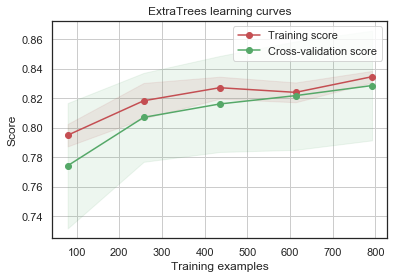

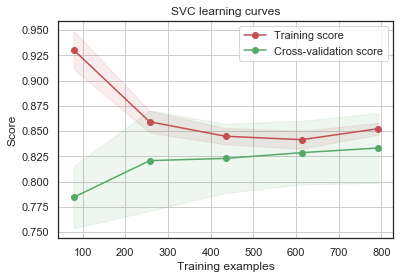

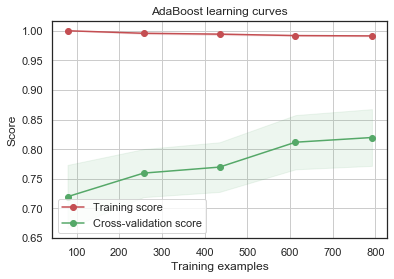

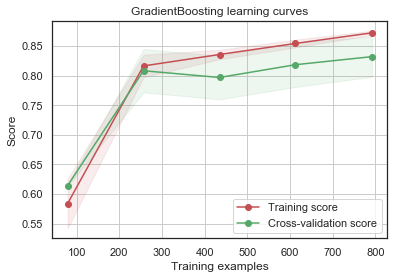

In [20]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    # 튜플 형태로 반환하는 듯 => 각각은 리스트?, array!
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1) # 평균
    train_scores_std = np.std(train_scores, axis=1) # 표준편차
    test_scores_mean = np.mean(test_scores, axis=1) # 평균
    test_scores_std = np.std(test_scores, axis=1) # 표준편차
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

GradientBoosting and Adaboost classifiers tend to overfit the training set.  
- GradientBoosting, Adaboost => 오버피팅 의심  

According to the growing cross-validation curves GradientBoosting and Adaboost could perform better with more training examples.  
- growing cross-validation에 따르면,  
  GradientBoosting, Adaboost => 사이즈가 커지면 퍼포먼스가 증가한다.  


SVC and ExtraTrees classifiers seem to better generalize the prediction since the training and cross-validation curves are close together.  
- SVC, ExtraTrees  
  => 예측이 일반화되어있다.  
  => training과 growing cross-validation가 같이 붙어서 움직이기 때문에
  


#### 6.1.4 Feature importance of tree based classifiers

In order to see the most informative features for the prediction of passengers survival, i displayed the feature importance for the 4 tree based classifiers.

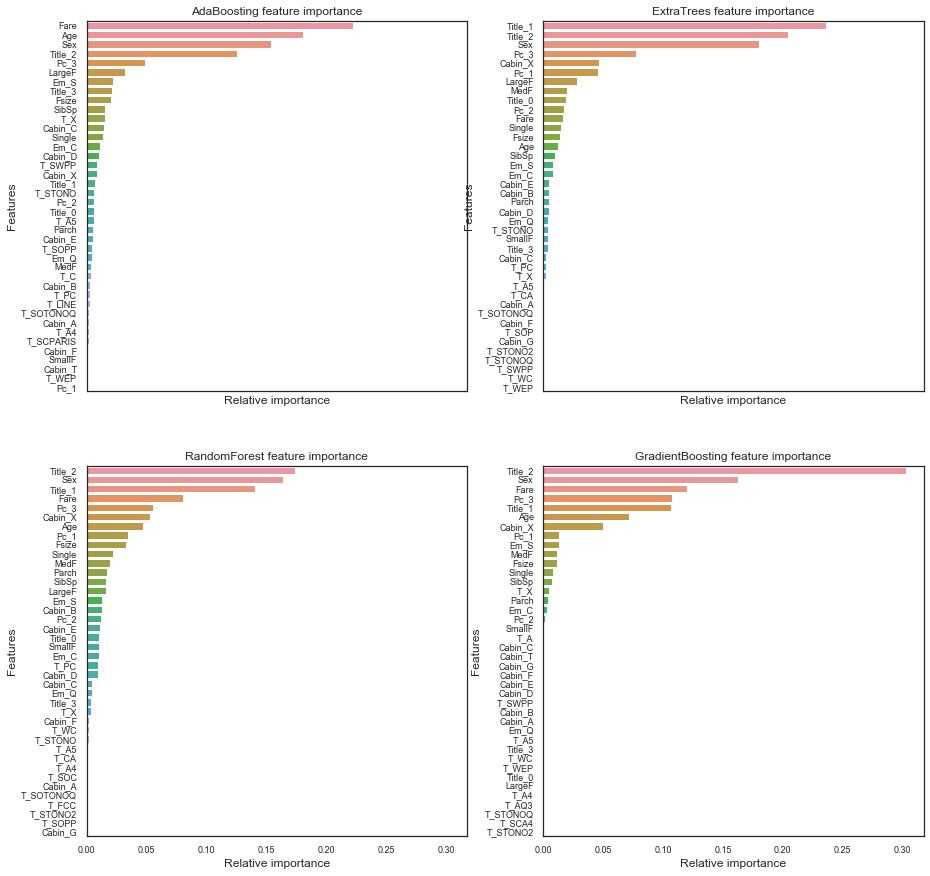

In [24]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [
    ("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

# 인덱스
nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        # argsort => sort한 index를 리스트형태로 준다.
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],
                        x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        # 인덱스
        nclassifier += 1

- 각각이 다른 feature importance를 가지고 있다.  
  => 각각의 예측도 다른 feature를 베이스로 삼는다!!
- 그럼에도 'Fare', 'Title_2', 'Age' and 'Sex'의 feature는 공유하고 있다.

- 저자가 찾아낸 것...  

We can say that:

    Pc_1, Pc_2, Pc_3 and Fare refer to the general social standing of passengers.

    Sex and Title_2 (Mrs/Mlle/Mme/Miss/Ms) and Title_3 (Mr) refer to the gender.

    Age and Title_1 (Master) refer to the age of passengers.

    Fsize, LargeF, MedF, Single refer to the size of the passenger family.


- Pc_3와 Fare는 본래 비례한 관계이고, 수치상으로도 같이 등장한다.
- Sex와 Title_2(Miss, ...), Title3(Mr)는 gende와 관계가 있다.

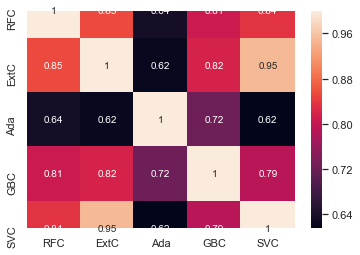

In [23]:
test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat(
    [test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1
)


g= sns.heatmap(ensemble_results.corr(),annot=True)

- 저자  
  
The prediction seems to be quite similar for the 5 classifiers except when Adaboost is compared to the others classifiers.

The 5 classifiers give more or less the same prediction but there is some differences.  
- 5개가 거의 같은 예측을 보이지만, 차이가 조금 있다.  

Theses differences between the 5 classifier predictions are sufficient to consider an ensembling vote.
- 차이로 보아 **ensembling vote(voting classifier)**하는 것을 충분히 고려해볼만 하다.

- Adaboost 제외하고 분류모델간의 상관관계가 잘 보인다.

### 6.2 Ensemble modeling

#### 6.2.1 Combining models

I choosed a voting classifier to combine the predictions coming from the 5 classifiers.

I preferred to pass the argument "soft" to the voting parameter to take into account the probability of each vote.
- soft 방식 사용 => 각각의 확률을 예측할 수 있기 때문에!

### voting classifier ( 다수결 분류 )  
  => **앙상블의 한 방식**
  
1. Hard Voting Classifier
    - 여러 모델 생성 후 성과 비교
    - 결과를 집계하여 가장 많이 얻는 클래스를 최종 예측값으로 결정하는 방식
    - 결정만을 본다.

1. Soft Voting Classifier
    - 모든 분류기가 클래스의 확률을 예측할 수 있을 때 사용가능
    - 예측을 평균내어서 홧률이 가장 높은 클래스로 예측한다. (가중치 투표)

In [25]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

### 6.3 Prediction

#### 6.3.1 Predict and Submit results

In [40]:
test_Survived = pd.Series(votingC.predict(test), name="Survived")

results = pd.concat([IDtest,test_Survived],axis=1)

results.to_csv("new_titanic_ensemble.csv",index=False)

You should use F1-Score instead of Accuracy. Accuracy can be very misleading if your training set is imbalanced (i.e., if a large number of examples belong to one class and a much smaller of examples belong to the other class), because in such cases the classifier tends to overfit and may achieve a high accuracy by simply always predicting the larger class.



- 트레이닝 셋이 언벨런스하다면,  
  => 상당 부분이 한쪽 클래스에 치우쳐있다면!
- F1-Score가 Accuracy보다 나을 것이다!!
  => 덩치가 큰 클래스쪽으로 overfitting될 여지가 크다.